In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DELL 7390\Documents\customer_support_tickets.csv")

In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [5]:
# Checking for % of null values in each column
(df.isnull().sum()/df.shape[0])*100

Ticket ID                        0.000000
Customer Name                    0.000000
Customer Email                   0.000000
Customer Age                     0.000000
Customer Gender                  0.000000
Product Purchased                0.000000
Date of Purchase                 0.000000
Ticket Type                      0.000000
Ticket Subject                   0.000000
Ticket Description               0.000000
Ticket Status                    0.000000
Resolution                      67.304286
Ticket Priority                  0.000000
Ticket Channel                   0.000000
First Response Time             33.286102
Time to Resolution              67.304286
Customer Satisfaction Rating    67.304286
dtype: float64

In [6]:
# Total Number of Rows and Columns
df.shape

(8469, 17)

In [7]:
# Checking for Data types
df.dtypes

Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

In [8]:
# Filled Missing values with "In Progress" as Ticket Status was "Open" or "Pending customer response"
df["Resolution"] = df["Resolution"].fillna("In Progress")

In [9]:
# Converted First Response Time to Date and Time Format and filled missing values with Median (Middle value)
df["First Response Time"] = pd.to_datetime(df["First Response Time"],errors = 'coerce')
df["First Response Time"] = df["First Response Time"].fillna(df["First Response Time"].median())
# Time to Resolution to Date and Time Format and filled missing values with backward fill
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], errors = 'coerce')
df["Time to Resolution"] = df["Time to Resolution"].bfill()
# Then, apply forward fill to handle the last NaN (if any)
df["Time to Resolution"] = df["Time to Resolution"].ffill()

In [10]:
# Checking For unique values in Ticket Priority Column
df["Ticket Priority"].unique()

array(['Critical', 'Low', 'High', 'Medium'], dtype=object)

In [11]:
# Mapping categorical ticket priority levels to numerical values for easier analysis.
# 'Low' -> 1, 'Medium' -> 2, 'High' -> 3, 'Critical' -> 4
priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}
df["Ticket Priority"] = df["Ticket Priority"].map(priority_mapping)

In [12]:
# # Filling missing values in the "Customer Satisfaction Rating" column with the most frequent (mode) rating.
# This ensures that NaN values are replaced with the most common rating in the dataset.
df.loc[:, "Customer Satisfaction Rating"] = df["Customer Satisfaction Rating"].fillna(df["Customer Satisfaction Rating"].mode()[0])

In [13]:
# Converted to Date and Time format
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"], errors = 'coerce')

In [14]:
df.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [15]:
df.dtypes

Ticket ID                                int64
Customer Name                           object
Customer Email                          object
Customer Age                             int64
Customer Gender                         object
Product Purchased                       object
Date of Purchase                datetime64[ns]
Ticket Type                             object
Ticket Subject                          object
Ticket Description                      object
Ticket Status                           object
Resolution                              object
Ticket Priority                          int64
Ticket Channel                          object
First Response Time             datetime64[ns]
Time to Resolution              datetime64[ns]
Customer Satisfaction Rating           float64
dtype: object

In [16]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,In Progress,4,Social media,2023-06-01 12:15:36,2023-06-01 18:05:38,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,In Progress,4,Chat,2023-06-01 16:45:38,2023-06-01 18:05:38,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,1,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,1,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,1,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [76]:
df.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Duration,Resolution Duration (Hours)
count,8469.000000,8469.000000,8469,8469,8469,8469.000000,8469,8469.000000
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:26:39.857361920,2023-06-01 11:10:18.947219200,2.997166,0 days 07:13:17.226827252,21201.584966
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000,0 days 00:00:00,12432.593611
25%,2118.000000,31.000000,2020-07-02 00:00:00,2023-06-01 08:21:01,2023-06-01 05:34:43,3.000000,0 days 03:00:00,16813.445278
50%,4235.000000,44.000000,2020-12-31 00:00:00,2023-06-01 11:26:25,2023-06-01 11:00:17,3.000000,0 days 06:27:02,21182.157222
75%,6352.000000,57.000000,2021-07-01 00:00:00,2023-06-01 14:34:32,2023-06-01 16:49:28,3.000000,0 days 10:30:01,25558.512500
max,8469.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000,0 days 23:47:56,29948.502500
std,2444.934048,15.296112,NaN,NaN,NaN,0.804446,0 days 05:06:18.721380919,5069.890304


In [17]:
df.to_csv("Cleaned_Customer_Support_Tickets.csv", index = False)

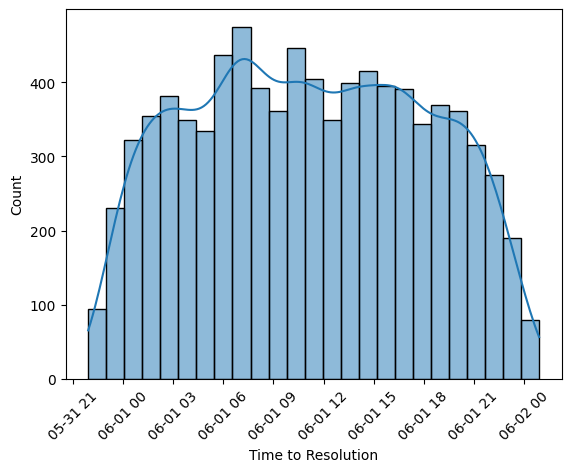

In [18]:
# Plot the histogram
sns.histplot(df["Time to Resolution"], kde = True)
# Formatting
plt.xticks(rotation = 45)
plt.show()

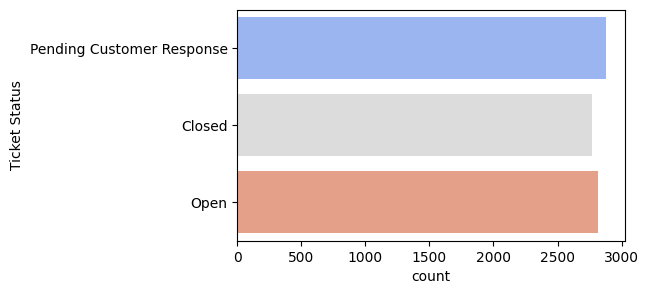

In [19]:
# Plot the countplot
plt.figure(figsize = (5,3))
sns.countplot(data = df, y = "Ticket Status", hue="Ticket Status", palette="coolwarm", legend=False)
plt.show()

In [20]:
df["Ticket Type"].unique()

array(['Technical issue', 'Billing inquiry', 'Cancellation request',
       'Product inquiry', 'Refund request'], dtype=object)

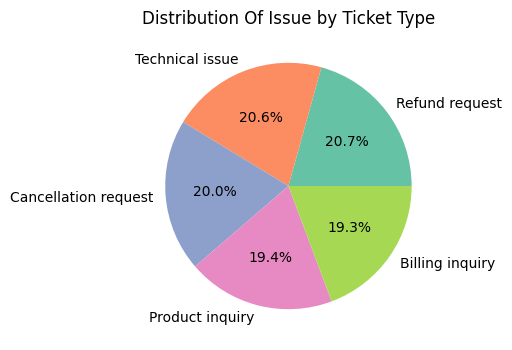

In [21]:
# Counting the value of Ticket type
ticket_counts = df["Ticket Type"].value_counts()

# Creating a pie chart
plt.figure(figsize = (4,4))
plt.pie(ticket_counts , labels = ticket_counts.index, autopct = '%1.1f%%' , colors = sns.color_palette("Set2"))
# Formatting
plt.title("Distribution Of Issue by Ticket Type")
plt.show()

In [22]:
df["Ticket Subject"].unique()

array(['Product setup', 'Peripheral compatibility', 'Network problem',
       'Account access', 'Data loss', 'Payment issue', 'Refund request',
       'Battery life', 'Installation support', 'Software bug',
       'Hardware issue', 'Product recommendation', 'Delivery problem',
       'Display issue', 'Cancellation request', 'Product compatibility'],
      dtype=object)

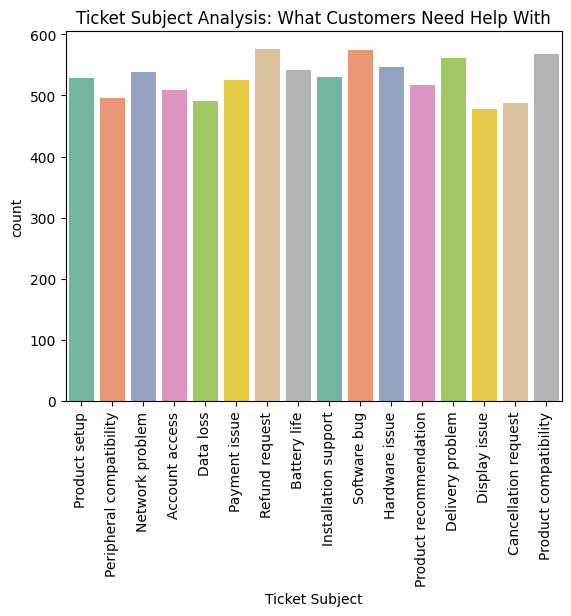

In [23]:
# Plot the countplot
sns.countplot(data = df, x = "Ticket Subject" , hue = "Ticket Subject" , palette = "Set2" )
# Formatting
plt.title("Ticket Subject Analysis: What Customers Need Help With")
plt.xticks(rotation = 90)
plt.show()

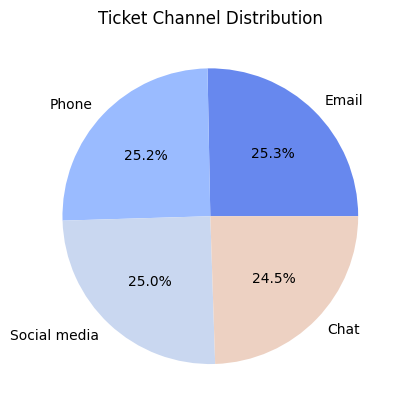

In [24]:
# Plot the pie chart
channel_count = df["Ticket Channel"].value_counts()
plt.pie(channel_count, labels = channel_count.index, autopct = "%1.1f%%" , colors = sns.color_palette("coolwarm"))
# Formatting
plt.title("Ticket Channel Distribution")
plt.show()

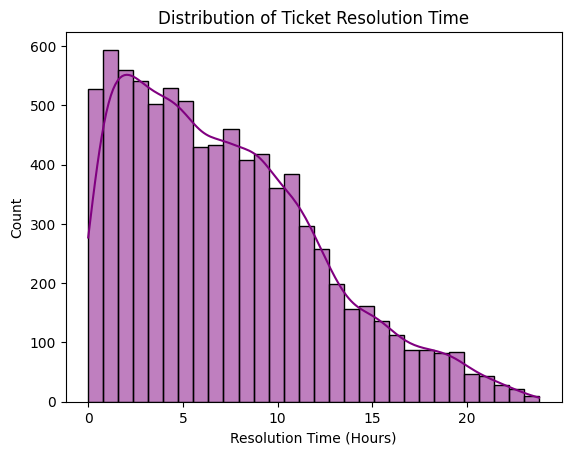

In [25]:
# Convert to datetime

# Calculate Resolution Time (ensure it's positive)
df["Resolution Duration"] = (df["Time to Resolution"] - df["First Response Time"]).abs()

# Convert timedelta to hours
df["Resolution Duration (Hours)"] = df["Resolution Duration"].dt.total_seconds() / 3600

# Plot histogram
sns.histplot(df["Resolution Duration (Hours)"], bins=30, kde=True, color="purple")
plt.xlabel("Resolution Time (Hours)")
plt.title("Distribution of Ticket Resolution Time")
plt.show()




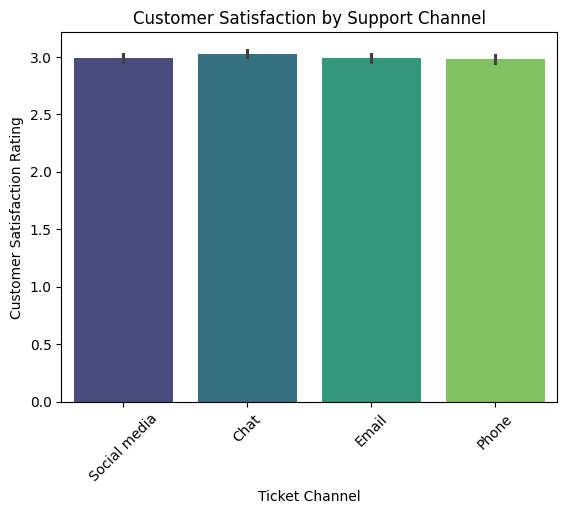

In [37]:
# Plot the bar chart
sns.barplot(data=df, y="Customer Satisfaction Rating",x ="Ticket Channel", hue = "Ticket Channel", palette="viridis")
# Formatting
plt.title("Customer Satisfaction by Support Channel")
plt.xticks(rotation=45)
plt.show()


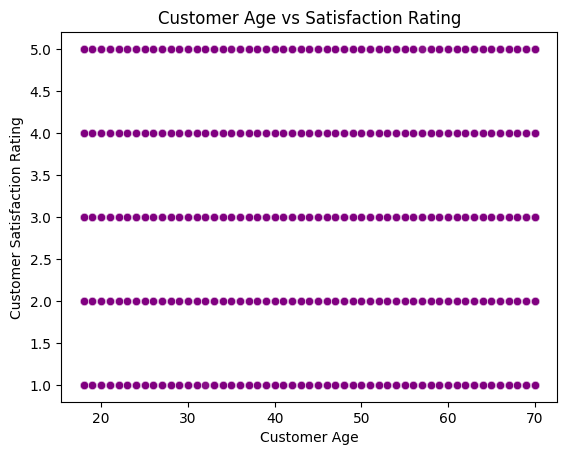

In [30]:
# Plot the scatterplot
sns.scatterplot(data=df, x="Customer Age", y="Customer Satisfaction Rating", alpha=0.6, color="purple")
# Formatting
plt.title("Customer Age vs Satisfaction Rating")
plt.show()


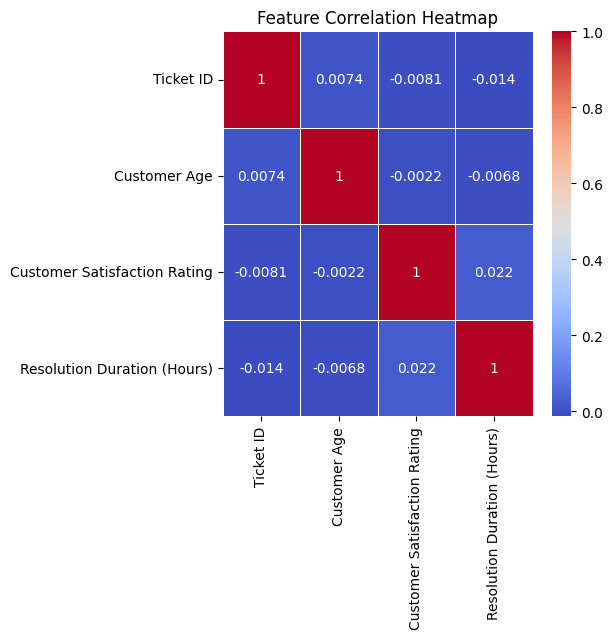

In [44]:
# Plot the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
# Formatting
plt.title("Feature Correlation Heatmap")
plt.show()


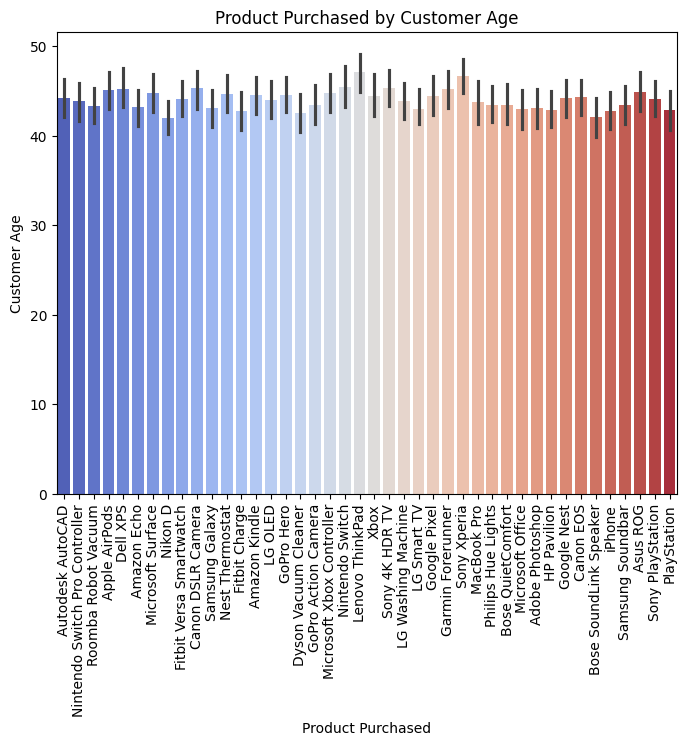

In [52]:
# Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot( data=df, x= "Product Purchased", y="Customer Age", hue = "Product Purchased", palette = "coolwarm", legend = False)
# Formatting
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title("Product Purchased by Customer Age")
plt.show()


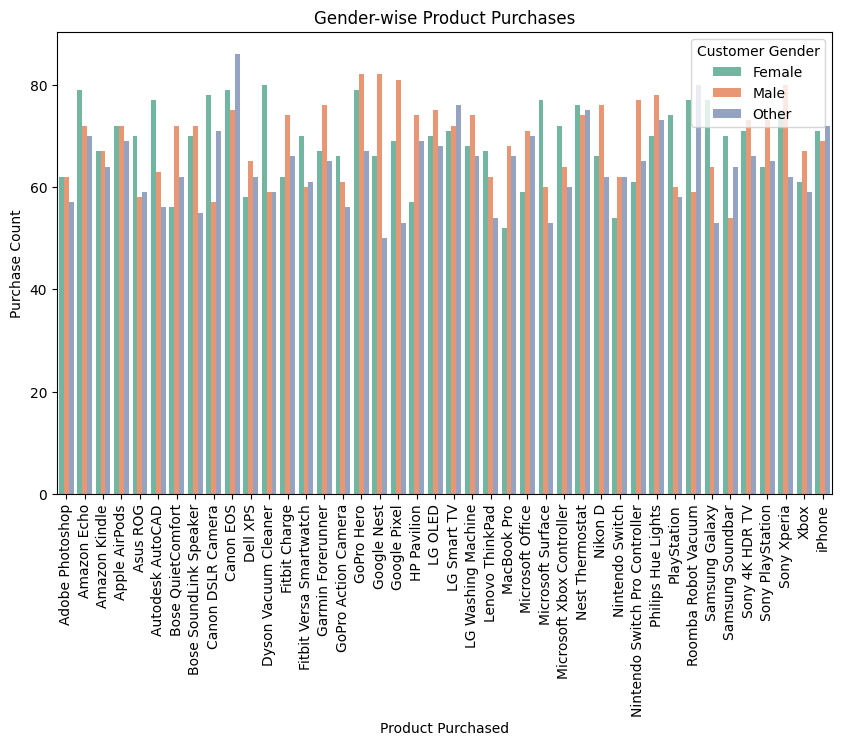

In [75]:
# Product count by customer gender
df_grouped = df.groupby(["Product Purchased", "Customer Gender"]).size().reset_index(name="Purchase Count")
# Plot the bar chart by Gender wise purchases
plt.figure(figsize=(10,6))
sns.barplot(x="Product Purchased", y="Purchase Count", hue="Customer Gender", data=df_grouped, palette = "Set2")
# Formatting
plt.xticks(rotation=90)
plt.title("Gender-wise Product Purchases")
plt.show()



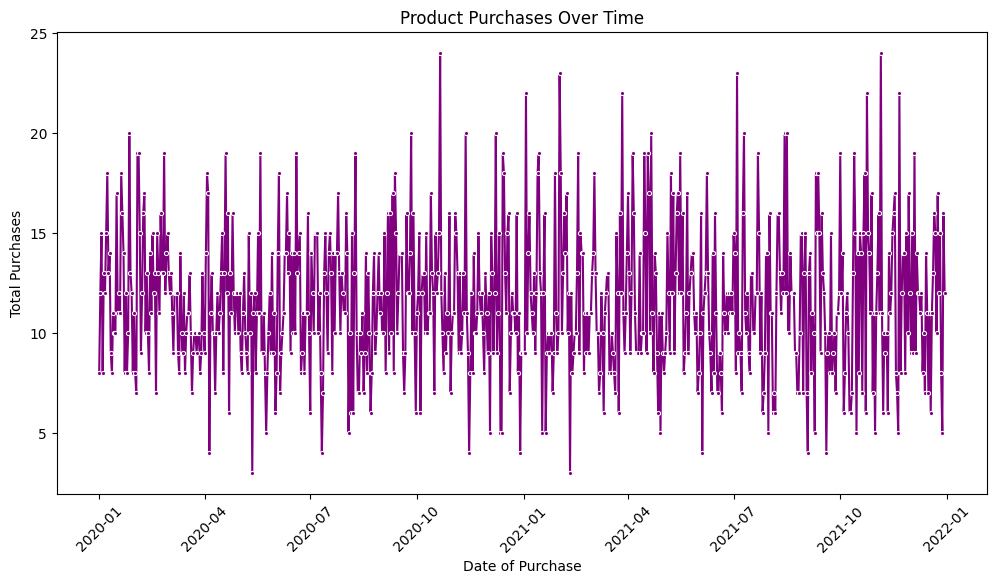

In [74]:
# Aggregate total purchases per day
df_time = df.groupby("Date of Purchase").size().reset_index(name="Total Purchases")

# Plot the line chart
plt.figure(figsize=(12,6))
sns.lineplot(x="Date of Purchase", y="Total Purchases", data = df_time, marker=".", color="purple")

# Formatting
plt.xticks(rotation=45)
plt.title("Product Purchases Over Time")
plt.xlabel("Date of Purchase")
plt.ylabel("Total Purchases")


plt.show()
